# Where will be NIFTY50 in year 2025? 

In [1]:
!pip install prophet

  Using cached https://files.pythonhosted.org/packages/27/d6/003e593296a85fd6ed616ed962795b2f87709c3eee2bca4f6d0fe55c6d00/wheel-0.37.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e9/86/b2ede1d87122a6d4da86d84cc35d0e48b4aa2476e4281d06101c772c1961/setuptools-62.6.0-py3-none-any.whl
  Found existing installation: holidays 0.9.11
    Uninstalling holidays-0.9.11:
      Successfully uninstalled holidays-0.9.11
  Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
  Found existing installation: wheel 0.33.6
    Uninstalling wheel-0.33.6:
      Successfully uninstalled wheel-0.33.6
  Found existing installation: setuptools 41.6.0
    Uninstalling setuptools-41.6.0:
      Successfully uninstalled setuptools-41.6.0


ERROR: pandas 1.3.5 has requirement numpy>=1.17.3; platform_machine != "aarch64" and platform_machine != "arm64" and python_version < "3.10", but you'll have numpy 1.16.5 which is incompatible.
ERROR: holidays 0.14.2 has requirement convertdate>=2.3.0, but you'll have convertdate 2.2.0 which is incompatible.
ERROR: cmdstanpy 1.0.4 has requirement numpy>=1.21, but you'll have numpy 1.16.5 which is incompatible.


In [2]:
!pip install pandas --upgrade 

Requirement already up-to-date: pandas in c:\programdata\anaconda3\lib\site-packages (1.3.5)
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


In [3]:
!pip install --upgrade numpy convertdate

Requirement already up-to-date: numpy in c:\programdata\anaconda3\lib\site-packages (1.21.6)
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-cp37-none-any.whl size=730973 sha256=4b26d8fa6e750b04bd74266138309c226db136e1db208d784fdb5b3aebfac5e8
  Stored in directory: C:\Users\Rajesh Swarnkar\AppData\Local\pip\Cache\wheels\34\a6\b3\13545a75ca1df24d3df4c07f39ea64e81a9fe7497c22547093
Successfully built pymeeus
  Found existing installation: PyMeeus 0.3.6
    Uninstalling PyMeeus-0.3.6:
      Successfully uninstalled PyMeeus-0.3.6
  Found existing installation: convertdate 2.2.0
    Uninstalling convertdate-2.2.0:
      Successfully uninstalled convertdate-2.2.0


In [26]:
import pandas as pd 

In [64]:
df = pd.read_csv("data/nifty50-jan-2000-july-2022.csv",  parse_dates=['Date']).set_index('Date')
df.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,884.15
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1973.69
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3084.79
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2531.18
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1914.63


In [65]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01'],
              dtype='datetime64[ns]', name='Date', length=5599, freq=None)

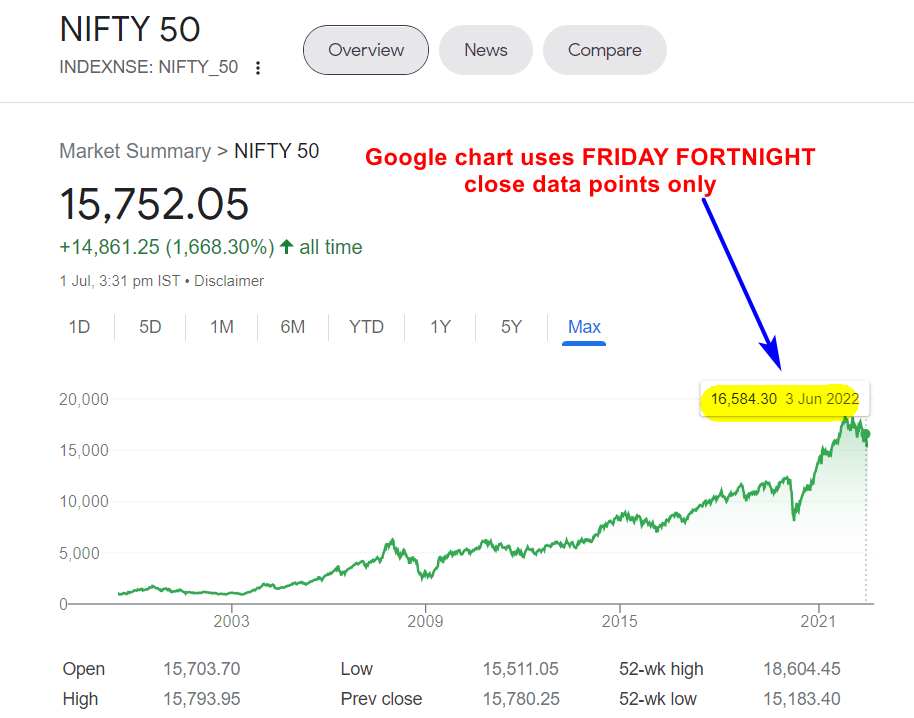

In [66]:
# Lets select only Friday close data
# https://stackoverflow.com/questions/60770909/python-pandas-time-series-dataframe-return-only-friday-data

#df = df[df.index.day_name() == 'Friday']
df.head()


,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,884.15
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1973.69
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3084.79
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2531.18
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1914.63


In [67]:
# We want only close price so drop rest columns:
df.drop(['Open', 'High', 'Low',  'Shares Traded', 'Turnover (Rs. Cr)'], axis=1, inplace=True)
df.head()

#Save the data as another dataframe
df.to_csv('data/nifty50-jan-2000-july-2022-fridays.csv')

## FB Prohet 

In [68]:
from prophet import Prophet

In [76]:
# Prophet requires renamed column names: 
df = pd.read_csv("data/nifty50-jan-2000-july-2022.csv", parse_dates=['Date'])
df = df.rename(columns={'Date':'ds','Close':'y'})
df.head()


,ds,Open,High,Low,y,Shares Traded,Turnover (Rs. Cr)
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,884.15
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1973.69
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3084.79
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2531.18
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1914.63


In [77]:
df

,ds,Open,High,Low,y,Shares Traded,Turnover (Rs. Cr)
0,2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,884.15
1,2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1973.69
2,2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3084.79
3,2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2531.18
4,2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1914.63
...,...,...,...,...,...,...,...
5594,2022-06-27,15926.20,15927.45,15815.50,15832.05,210932505,17770.42
5595,2022-06-28,15757.45,15892.10,15710.15,15850.20,251865155,18419.75
5596,2022-06-29,15701.70,15861.60,15687.80,15799.10,444949551,22528.57
5597,2022-06-30,15774.50,15890.00,15728.85,15780.25,306027777,23970.65


In [78]:
# We wnat to know the Nifty50 after 2025 : 
# https://www.timeanddate.com/date/durationresult.html?d1=1&m1=7&y1=2022&d2=4&m2=7&y2=2025

last = df[len(df)-1100:]
last

,ds,Open,High,Low,y,Shares Traded,Turnover (Rs. Cr)
4499,2018-01-22,10883.20,10975.10,10881.40,10966.20,238815813,14469.06
4500,2018-01-23,10997.40,11092.90,10994.55,11083.70,293445774,16423.91
4501,2018-01-24,11069.35,11110.10,11046.15,11086.00,292197072,16915.14
4502,2018-01-25,11095.60,11095.60,11009.20,11069.65,340469462,19939.54
4503,2018-01-29,11079.35,11171.55,11075.95,11130.40,249220726,16118.36
...,...,...,...,...,...,...,...
5594,2022-06-27,15926.20,15927.45,15815.50,15832.05,210932505,17770.42
5595,2022-06-28,15757.45,15892.10,15710.15,15850.20,251865155,18419.75
5596,2022-06-29,15701.70,15861.60,15687.80,15799.10,444949551,22528.57
5597,2022-06-30,15774.50,15890.00,15728.85,15780.25,306027777,23970.65


In [79]:
df = df[:-1100]

In [80]:
df['ds']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
4494   2018-01-15
4495   2018-01-16
4496   2018-01-17
4497   2018-01-18
4498   2018-01-19
Name: ds, Length: 4499, dtype: datetime64[ns]

In [81]:
fbp = Prophet(daily_seasonality=True)


In [82]:
fbp.fit(df)
future = fbp.make_future_dataframe(periods=365)

19:02:07 - cmdstanpy - INFO - Chain [1] start processing
19:02:15 - cmdstanpy - INFO - Chain [1] done processing
19:02:15 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
19:02:15 - cmdstanpy - INFO - Chain [1] start processing
19:02:16 - cmdstanpy - INFO - Chain [1] done processing
19:02:16 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization: 